In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,Placed,425000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 23.6+ KB


In [4]:
# seperating the categorical and numerical columns

catvars = list(df.select_dtypes(include=['object']).columns)

numvars = list(df.select_dtypes(include=['int32','int64','float32','float64']).columns)


print(catvars,numvars)

['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status'] ['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'salary']


In [5]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
status             0
salary            67
dtype: int64

### Handling Null values

In [6]:
df.shape

(215, 14)

In [7]:
def plotdistplot(col):
    
    plt.figure(figsize=(15,7))
    sns.distplot(df['salary'],kde=True,hist=False,label='Actual Salary',color='orange')
    sns.distplot(df[col],kde=True,hist=False,label=col,color='black')
    

In [8]:
mostfreq = list(dict(df['salary'].value_counts()).items())[0]
mostfreq

(300000.0, 22)

In [9]:
df['salary'].mode()[0]

300000.0

In [10]:
df['salary_mean'] = df['salary'].fillna(df['salary'].mean())
df['salary_median'] = df['salary'].fillna(df['salary'].median())
df['salary_mode'] = df['salary'].fillna(df['salary'].mode()[0])
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,status,salary,salary_mean,salary_median,salary_mode
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,Placed,270000.0,270000.000000,270000.0,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,Placed,200000.0,200000.000000,200000.0,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,Placed,250000.0,250000.000000,250000.0,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,Not Placed,NaN,288655.405405,265000.0,300000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,Placed,425000.0,425000.000000,425000.0,425000.0


<ipython-input-7-627d52c8fde8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['salary'],kde=True,hist=False,label='Actual Salary',color='orange')
<ipython-input-7-627d52c8fde8>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True,hist=False,label=col,color='bl

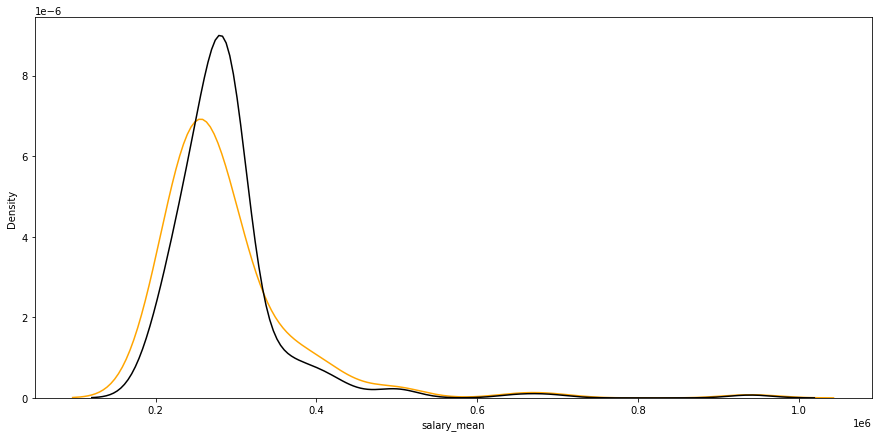

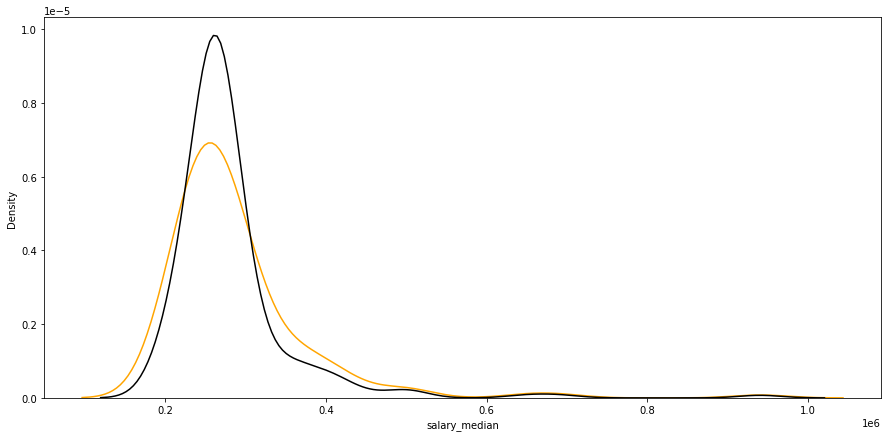

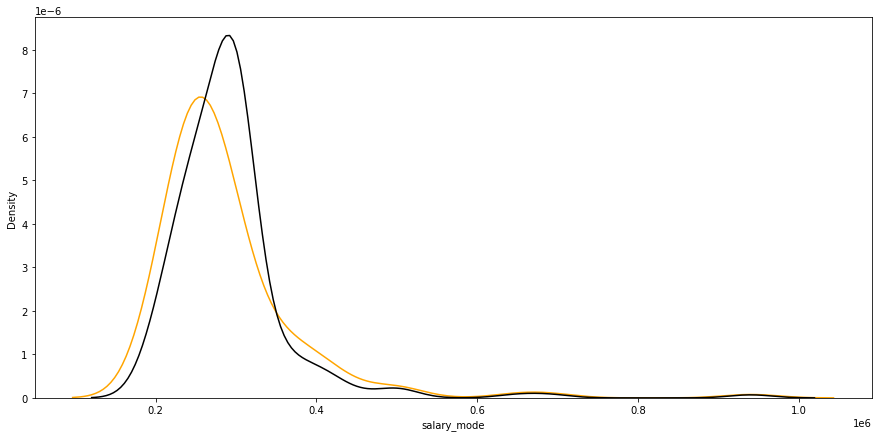

In [11]:
sallist = ['salary_mean','salary_median','salary_mode']
for sal in sallist:
    plotdistplot(sal)

In [12]:
# filling the salary with mean

df['salary'] = df['salary'].fillna(df['salary'].mean())
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,status,salary,salary_mean,salary_median,salary_mode
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,Placed,270000.000000,270000.000000,270000.0,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,Placed,200000.000000,200000.000000,200000.0,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,Placed,250000.000000,250000.000000,250000.0,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,Not Placed,288655.405405,288655.405405,265000.0,300000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,Placed,425000.000000,425000.000000,425000.0,425000.0


In [13]:
df = df.drop(columns=['salary_mean', 'salary_median', 'salary_mode'],axis=1)
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
status            0
salary            0
dtype: int64

## EDA

In [14]:
df['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

<AxesSubplot: xlabel='status', ylabel='count'>

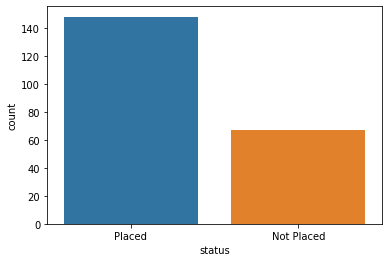

In [15]:
sns.countplot(data = df,x = 'status')

In [22]:
getdict = {}
getdict['gender'] = dict(df['gender'].value_counts())
getdict['status'] = dict(df['status'].value_counts())
getdict

{'gender': {'M': 139, 'F': 76}, 'status': {'Placed': 148, 'Not Placed': 67}}

Count Plot for feature gender is shown ↓


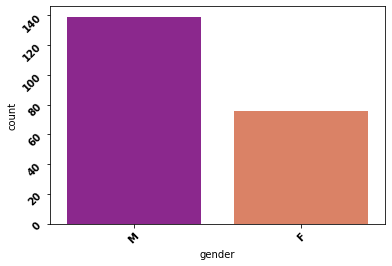

Count Plot for feature ssc_b is shown ↓


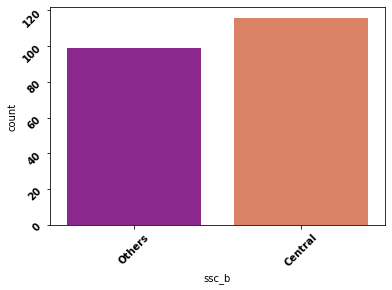

Count Plot for feature hsc_b is shown ↓


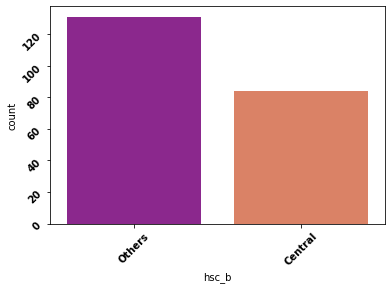

Count Plot for feature hsc_s is shown ↓


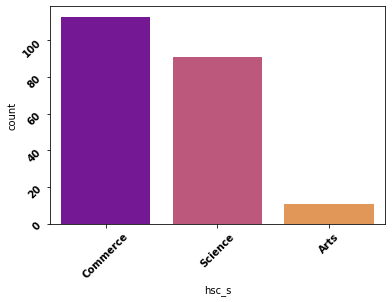

Count Plot for feature degree_t is shown ↓


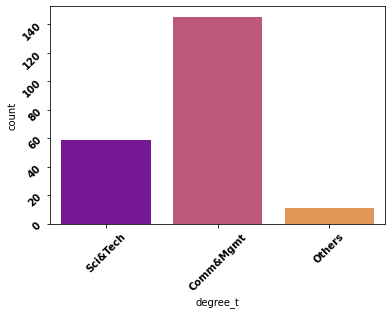

Count Plot for feature workex is shown ↓


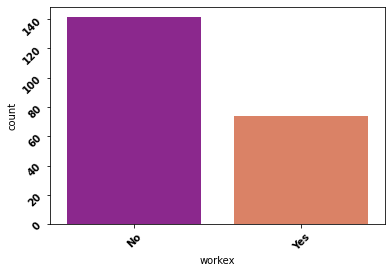

Count Plot for feature specialisation is shown ↓


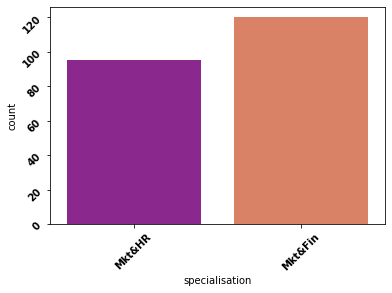

Count Plot for feature status is shown ↓


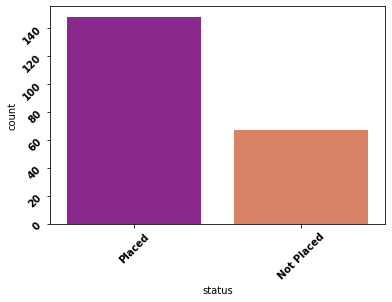

In [16]:
def valuecount(col):
    
    return dict(df[col].value_counts())

def getcountplot(col):
    
    sns.countplot(data = df,x = col,palette='plasma')
    plt.xticks(rotation = 45,fontweight = 'bold',fontsize = '10')
    plt.yticks(rotation = 45,fontweight = 'bold',fontsize = '10')
    plt.show()
    

for col in catvars:
    print(f'Count Plot for feature {col} is shown ↓')
    getcountplot(col)
    print('='*75)

In [17]:
getfinaldict = {}
for col in catvars:
    getfinaldict[col] = valuecount(col)
    
getfinaldict

{'gender': {'M': 139, 'F': 76},
 'ssc_b': {'Central': 116, 'Others': 99},
 'hsc_b': {'Others': 131, 'Central': 84},
 'hsc_s': {'Commerce': 113, 'Science': 91, 'Arts': 11},
 'degree_t': {'Comm&Mgmt': 145, 'Sci&Tech': 59, 'Others': 11},
 'workex': {'No': 141, 'Yes': 74},
 'specialisation': {'Mkt&Fin': 120, 'Mkt&HR': 95},
 'status': {'Placed': 148, 'Not Placed': 67}}

In [18]:
# top science students placed

df[(df['degree_t']=='Sci&Tech')&(df['status']=='Placed')].sort_values(by = 'salary',ascending = False).reset_index().head(5)
    

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,status,salary
0,150,151,M,71.00,Central,58.66,Central,Science,58.00,Sci&Tech,Yes,56.0,Mkt&Fin,Placed,690000.0
1,77,78,M,64.00,Others,80.00,Others,Science,65.00,Sci&Tech,Yes,69.0,Mkt&Fin,Placed,500000.0
2,163,164,M,63.00,Others,67.00,Others,Science,64.00,Sci&Tech,No,75.0,Mkt&Fin,Placed,500000.0
3,174,175,M,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.0,Mkt&Fin,Placed,500000.0
4,53,54,M,80.00,Others,70.00,Others,Science,72.00,Sci&Tech,No,87.0,Mkt&HR,Placed,450000.0


In [19]:
# top Comm&Mgt students placed

df[(df['degree_t']=='Comm&Mgmt')&(df['status']=='Placed')].sort_values(by = 'salary',ascending = False).reset_index().head(5)
 

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,status,salary
0,119,120,M,60.8,Central,68.4,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,Placed,940000.0
1,177,178,F,73.0,Central,97.0,Others,Commerce,79.0,Comm&Mgmt,Yes,89.00,Mkt&Fin,Placed,650000.0
2,4,5,M,85.8,Central,73.6,Central,Commerce,73.3,Comm&Mgmt,No,96.80,Mkt&Fin,Placed,425000.0
3,95,96,M,73.0,Central,78.0,Others,Commerce,65.0,Comm&Mgmt,Yes,95.46,Mkt&Fin,Placed,420000.0
4,210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.00,Mkt&Fin,Placed,400000.0


In [20]:
# max and min salary
# observation : max salary : 9,40,000 and min salary : 2,00,000

df[(df['salary']==max(df['salary'])) | (df['salary']==min(df['salary']))]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,status,salary
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,Placed,200000.0
15,16,F,65.00,Central,75.00,Central,Commerce,69.00,Comm&Mgmt,Yes,72.00,Mkt&Fin,Placed,200000.0
44,45,F,77.00,Others,73.00,Others,Commerce,81.00,Comm&Mgmt,Yes,89.00,Mkt&Fin,Placed,200000.0
50,51,F,75.20,Central,73.20,Central,Science,68.40,Comm&Mgmt,No,65.00,Mkt&HR,Placed,200000.0
107,108,M,82.00,Others,90.00,Others,Commerce,83.00,Comm&Mgmt,No,80.00,Mkt&HR,Placed,200000.0
119,120,M,60.80,Central,68.40,Central,Commerce,64.60,Comm&Mgmt,Yes,82.66,Mkt&Fin,Placed,940000.0
135,136,F,72.00,Central,56.00,Others,Science,69.00,Comm&Mgmt,No,55.60,Mkt&HR,Placed,200000.0


In [21]:
# students with salary more than avg salary science dept

df[(df['degree_t']=='Sci&Tech')&(df['salary']>df['salary'].mean())].sort_values(by = 'salary',ascending = False).reset_index()

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,status,salary
0,150,151,M,71.00,Central,58.66,Central,Science,58.00,Sci&Tech,Yes,56.00,Mkt&Fin,Placed,690000.0
1,174,175,M,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.00,Mkt&Fin,Placed,500000.0
2,77,78,M,64.00,Others,80.00,Others,Science,65.00,Sci&Tech,Yes,69.00,Mkt&Fin,Placed,500000.0
3,163,164,M,63.00,Others,67.00,Others,Science,64.00,Sci&Tech,No,75.00,Mkt&Fin,Placed,500000.0
4,53,54,M,80.00,Others,70.00,Others,Science,72.00,Sci&Tech,No,87.00,Mkt&HR,Placed,450000.0
5,39,40,M,81.00,Others,68.00,Others,Science,64.00,Sci&Tech,No,93.00,Mkt&Fin,Placed,411000.0
6,145,146,M,89.40,Others,65.66,Others,Science,71.25,Sci&Tech,No,72.00,Mkt&HR,Placed,400000.0
7,128,129,M,80.40,Central,73.40,Central,Science,77.72,Sci&Tech,Yes,81.20,Mkt&HR,Placed,400000.0
8,22,23,F,69.80,Others,60.80,Others,Science,72.23,Sci&Tech,No,55.53,Mkt&HR,Placed,360000.0
9,24,25,M,76.50,Others,97.70,Others,Science,78.86,Sci&Tech,No,97.40,Mkt&Fin,Placed,360000.0


In [22]:
# students with salary more than avg salary Comm&Mgmt dept

df[(df['degree_t']=='Comm&Mgmt')&(df['salary']>df['salary'].mean())].sort_values(by = 'salary',ascending = False).reset_index()

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,status,salary
0,119,120,M,60.80,Central,68.40,Central,Commerce,64.60,Comm&Mgmt,Yes,82.66,Mkt&Fin,Placed,940000.0
1,177,178,F,73.00,Central,97.00,Others,Commerce,79.00,Comm&Mgmt,Yes,89.00,Mkt&Fin,Placed,650000.0
2,4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,Placed,425000.0
3,95,96,M,73.00,Central,78.00,Others,Commerce,65.00,Comm&Mgmt,Yes,95.46,Mkt&Fin,Placed,420000.0
4,85,86,F,83.84,Others,89.83,Others,Commerce,77.20,Comm&Mgmt,Yes,78.74,Mkt&Fin,Placed,400000.0
5,210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.00,Mkt&Fin,Placed,400000.0
6,21,22,F,79.00,Others,76.00,Others,Commerce,85.00,Comm&Mgmt,No,95.00,Mkt&Fin,Placed,393000.0
7,101,102,M,63.00,Central,72.00,Central,Commerce,68.00,Comm&Mgmt,No,78.00,Mkt&HR,Placed,380000.0
8,104,105,M,69.00,Central,63.00,Others,Science,65.00,Comm&Mgmt,Yes,55.00,Mkt&HR,Placed,360000.0
9,57,58,M,68.00,Central,76.00,Central,Commerce,74.00,Comm&Mgmt,No,80.00,Mkt&Fin,Placed,360000.0


<AxesSubplot: xlabel='degree_t'>

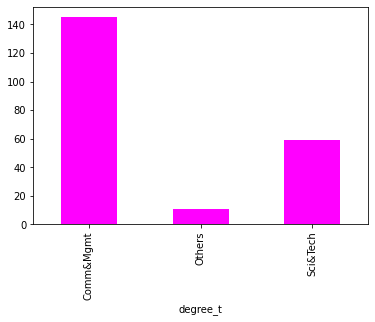

In [23]:
# maximum students placed are from comm&mgt

df.groupby(['degree_t'])['status'].count().plot(kind = 'bar',color = 'magenta')

<AxesSubplot: xlabel='specialisation'>

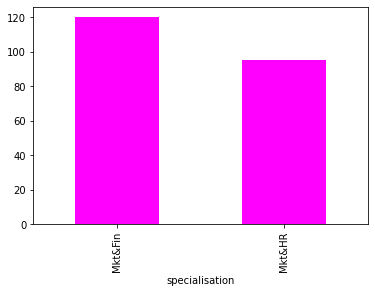

In [24]:
# Marketing and Finance specialisation are placed more

df.groupby(['specialisation'])['status'].count().plot(kind = 'bar',color = 'magenta')

<AxesSubplot: ylabel='status'>

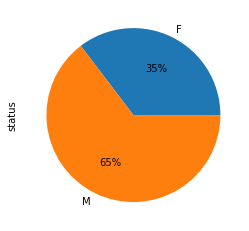

In [25]:
# females placed 35% and males 65%

df.groupby(['gender'])['status'].count().plot(kind = 'pie',autopct='%1.0f%%')

In [26]:
# max female salary ~ 6,50,000

temp = df[df['gender']=='F']
temp[temp['salary']==max(temp['salary'])].style.background_gradient(cmap = 'plasma')

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,status,salary
177,178,F,73.000000,Central,97.000000,Others,Commerce,79.000000,Comm&Mgmt,Yes,89.000000,Mkt&Fin,Placed,650000.000000


<AxesSubplot: ylabel='status'>

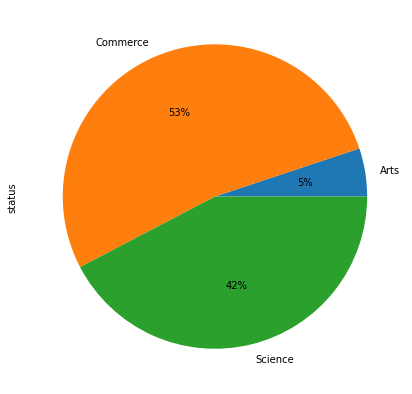

In [27]:
df.groupby(['hsc_s'])['status'].count().plot(kind = 'pie',autopct='%1.0f%%',figsize=(15,7))

In [28]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,Placed,270000.000000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,Placed,200000.000000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,Placed,250000.000000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,Not Placed,288655.405405
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,Placed,425000.000000


In [29]:
getfinaldict

{'gender': {'M': 139, 'F': 76},
 'ssc_b': {'Central': 116, 'Others': 99},
 'hsc_b': {'Others': 131, 'Central': 84},
 'hsc_s': {'Commerce': 113, 'Science': 91, 'Arts': 11},
 'degree_t': {'Comm&Mgmt': 145, 'Sci&Tech': 59, 'Others': 11},
 'workex': {'No': 141, 'Yes': 74},
 'specialisation': {'Mkt&Fin': 120, 'Mkt&HR': 95},
 'status': {'Placed': 148, 'Not Placed': 67}}

In [30]:
len(getfinaldict['status']),len(getfinaldict['degree_t'])

(2, 3)

In [31]:
boolcols = []
for key,value in getfinaldict.items():
    if len(getfinaldict[key]) == 2:
        boolcols.append(key)
print(boolcols)

tripcols = []

for key in getfinaldict.keys():
    if key not in boolcols:
        tripcols.append(key)
print(tripcols)

['gender', 'ssc_b', 'hsc_b', 'workex', 'specialisation', 'status']
['hsc_s', 'degree_t']


In [32]:
boolcols = [key for key,value in getfinaldict.items() if len(getfinaldict[key])==2]
tripcols = [key for key in list(getfinaldict.keys()) if key not in boolcols]

print(boolcols,tripcols)

['gender', 'ssc_b', 'hsc_b', 'workex', 'specialisation', 'status'] ['hsc_s', 'degree_t']


## Label Encoding process

In [33]:
def labelencode(le,col):
    
    df[col] = le.fit_transform(df[col])
    
    
getmappings = {}
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in list(getfinaldict.keys()):
    labelencode(le,col)
    getmappings[col] = dict(zip(le.classes_,le.transform(le.classes_)))
    

df.head()


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,1,270000.000000
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,1,200000.000000
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,1,250000.000000
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,0,288655.405405
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,1,425000.000000


In [34]:
# this was the internal mapping structure followed by label encoder for mapping

getmappings

{'gender': {'F': 0, 'M': 1},
 'ssc_b': {'Central': 0, 'Others': 1},
 'hsc_b': {'Central': 0, 'Others': 1},
 'hsc_s': {'Arts': 0, 'Commerce': 1, 'Science': 2},
 'degree_t': {'Comm&Mgmt': 0, 'Others': 1, 'Sci&Tech': 2},
 'workex': {'No': 0, 'Yes': 1},
 'specialisation': {'Mkt&Fin': 0, 'Mkt&HR': 1},
 'status': {'Not Placed': 0, 'Placed': 1}}

In [35]:
# removing unwated columns

df = df.drop(['sl_no'],axis=1)
df.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,1,200000.0


## Numerical Columns EDA

In [36]:
numvars[1:]

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'salary']

Distribution plots for col : ssc_p are shown ↓


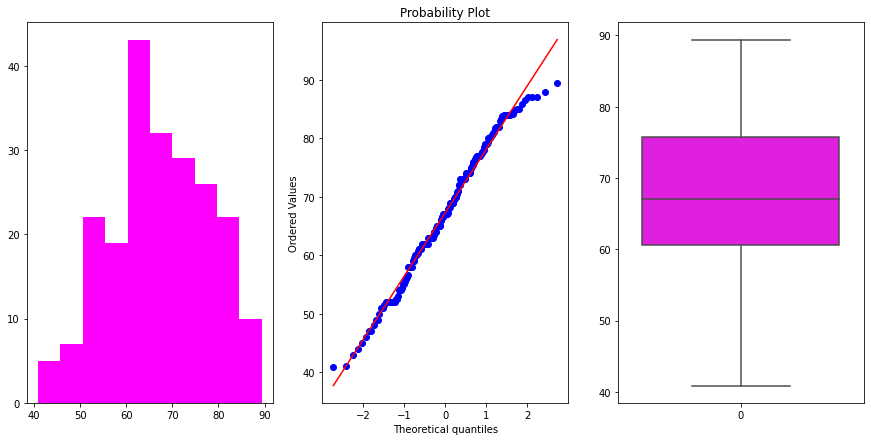

Distribution plots for col : hsc_p are shown ↓


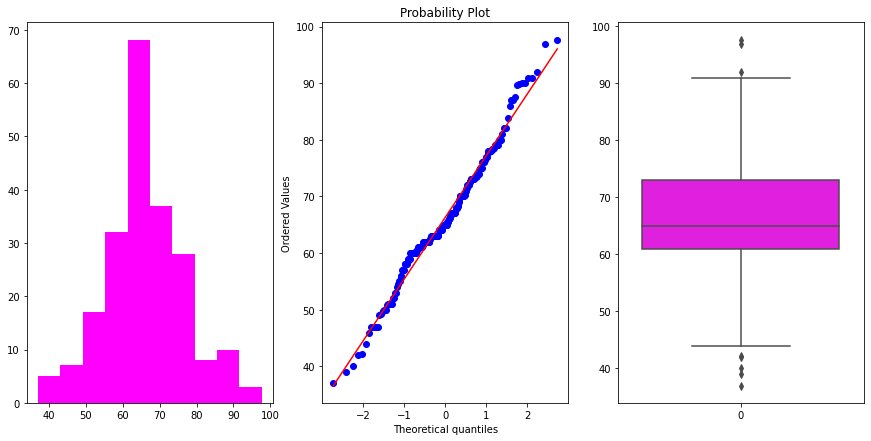

Distribution plots for col : degree_p are shown ↓


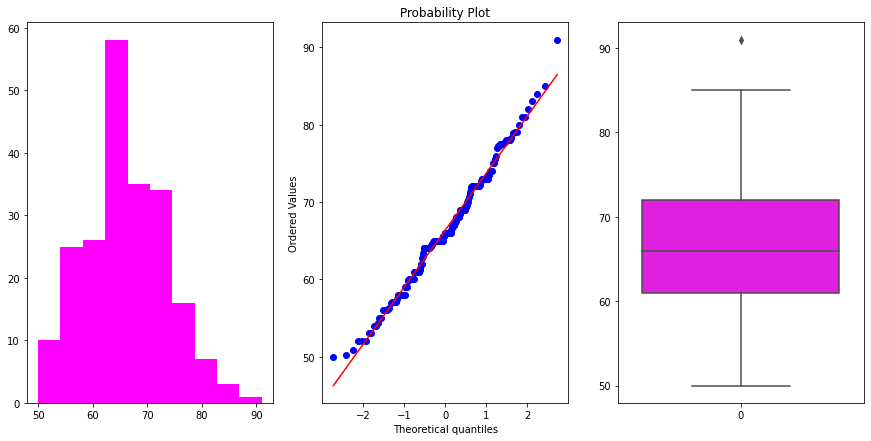

Distribution plots for col : etest_p are shown ↓


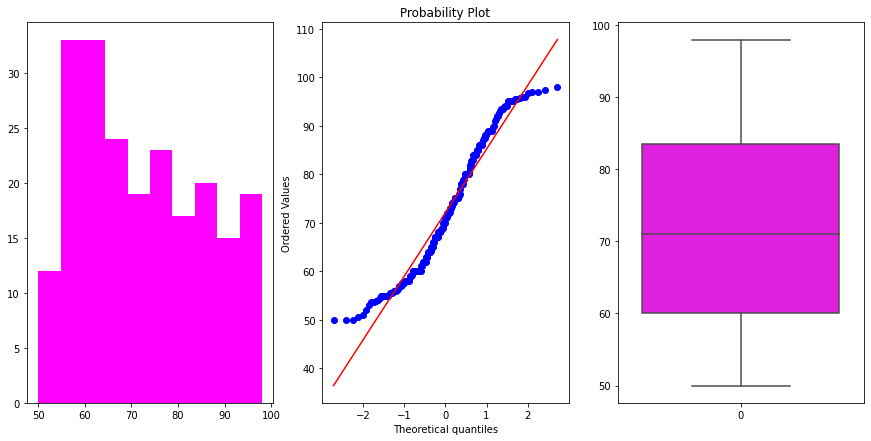

Distribution plots for col : salary are shown ↓


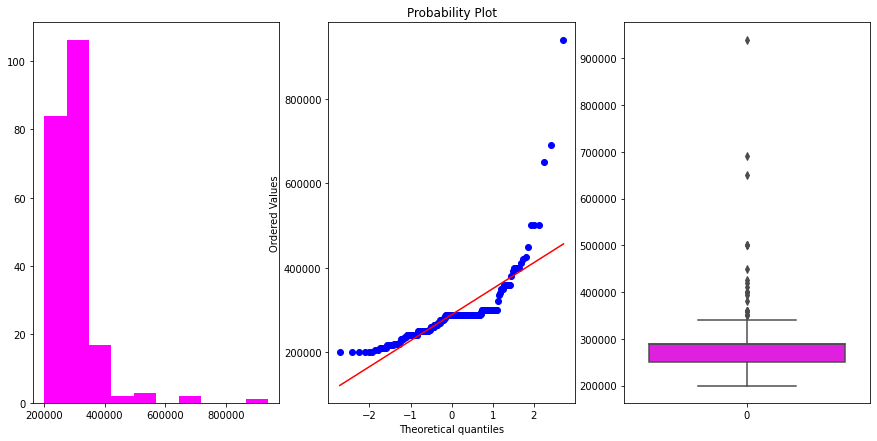

In [37]:
import scipy.stats as stats

def getplots(df,col):
    
    plt.figure(figsize=(15,7))
    plt.subplot(1,3,1)
    plt.hist(df[col],color='magenta')
    
    plt.subplot(1,3,2)
    stats.probplot(df[col],dist='norm',plot=plt)
    
    plt.subplot(1,3,3)
    sns.boxplot(df[col],color='magenta')
    
    plt.show()
    
    
for col in numvars[1:]:
    print(f'Distribution plots for col : {col} are shown ↓')
    getplots(df,col)
    print('='*10)

# Feature Selection

<AxesSubplot: >

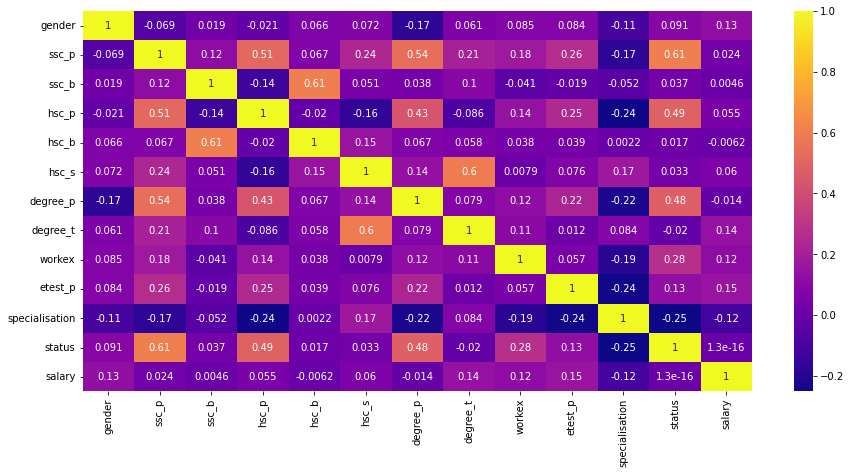

In [38]:
# checking for tightly correlated features

plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='plasma')

In [39]:
'''
We will drop the salary column as well
coz after getting the placement we will get to know the salary right!

'''


data = df.copy()
test = data['status']
train = data.drop(['status','salary'],axis = 1)
train.head(2)


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0


In [40]:
## extratrees classifier

from sklearn.ensemble import ExtraTreesClassifier
ec = ExtraTreesClassifier()
ec.fit(train,test)

ExtraTreesClassifier()

<AxesSubplot: >

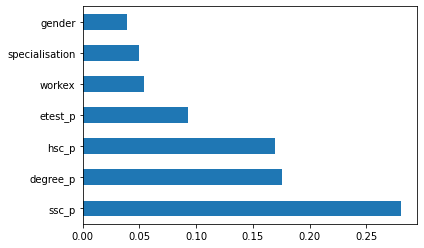

In [41]:
featbar = pd.Series(ec.feature_importances_,index=train.columns)
featbar.nlargest(7).plot(kind = 'barh')

<AxesSubplot: >

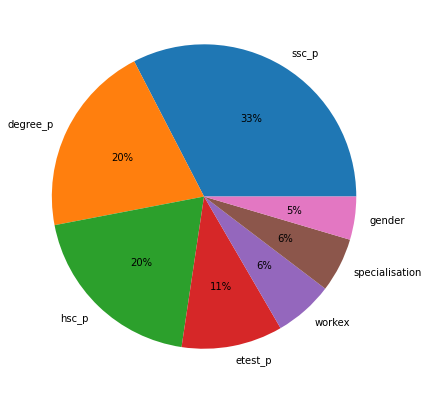

In [42]:
featbar.nlargest(7).plot(kind='pie',autopct='%1.0f%%',figsize = (15,7))

<AxesSubplot: >

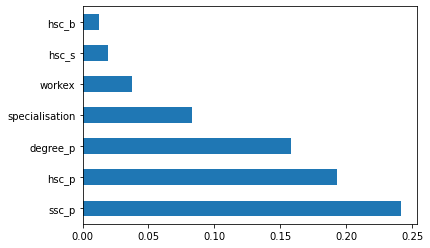

In [43]:
# mutual classif

from sklearn.feature_selection import mutual_info_classif
mc = mutual_info_classif(train,test)
ax = pd.Series(mc,index=train.columns)
ax.nlargest(7).plot(kind = 'barh')

<AxesSubplot: >

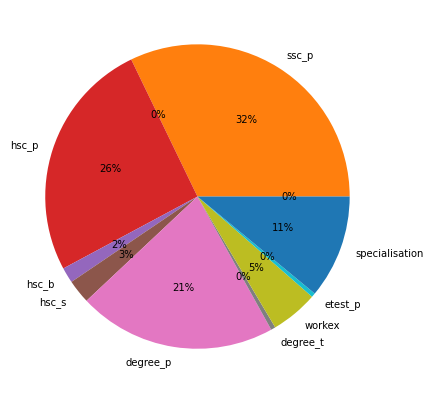

In [44]:
pd.Series(mc,index=train.columns).plot(kind = 'pie',autopct='%1.0f%%',figsize = (15,7))

In [45]:
'''
Selecting the top 10 contributing features in both cases
and then we will do the intersection of both the results
so that we will get atleast top 5 most contributing features!

'''

featcol = list(featbar.nlargest(10).index)
mutclasif = list(ax.nlargest(10).index)
commoncols = list(set(featcol).intersection(set(mutclasif)))
print(commoncols)

['degree_t', 'specialisation', 'gender', 'hsc_p', 'workex', 'degree_p', 'etest_p', 'ssc_p', 'hsc_s']


In [46]:
# selecting the common cols and will do training on these cols!
# these cols were selected as a nlargest result of 2 feature selection techniques!

train = df[commoncols]
train.head()

,degree_t,specialisation,gender,hsc_p,workex,degree_p,etest_p,ssc_p,hsc_s
0,2,1,1,91.00,0,58.00,55.0,67.00,1
1,2,0,1,78.33,1,77.48,86.5,79.33,2
2,0,0,1,68.00,0,64.00,75.0,65.00,0
3,2,1,1,52.00,0,52.00,66.0,56.00,2
4,0,0,1,73.60,0,73.30,96.8,85.80,1


In [47]:
'''
From the above DF we notice that gender,specialisation,degree_t,workex are the 
categorical columns and they make sense isn't it?,for any placement drive
students are first filtered on basis of their boards,sem scores which in this case are {mba_p,ssc_p,degree_p,hsc_p}
and then workexperience also matters a lot!,then specialisation as well,gender is also important
because now-a-days few companies focus on women empowerment,so yes,all the features make perfect sense!

'''
getmappings

{'gender': {'F': 0, 'M': 1},
 'ssc_b': {'Central': 0, 'Others': 1},
 'hsc_b': {'Central': 0, 'Others': 1},
 'hsc_s': {'Arts': 0, 'Commerce': 1, 'Science': 2},
 'degree_t': {'Comm&Mgmt': 0, 'Others': 1, 'Sci&Tech': 2},
 'workex': {'No': 0, 'Yes': 1},
 'specialisation': {'Mkt&Fin': 0, 'Mkt&HR': 1},
 'status': {'Not Placed': 0, 'Placed': 1}}

In [48]:
# renaming the cols

train = train[['gender','specialisation','degree_t','workex','ssc_p','hsc_p','degree_p']]
train.columns = ['Gender','Specialisation','Techinal Degree','Work Experience','SSC_p','High School_p','Degree_p']
train.head()

,Gender,Specialisation,Techinal Degree,Work Experience,SSC_p,High School_p,Degree_p
0,1,1,2,0,67.00,91.00,58.00
1,1,0,2,1,79.33,78.33,77.48
2,1,0,0,0,65.00,68.00,64.00
3,1,1,2,0,56.00,52.00,52.00
4,1,0,0,0,85.80,73.60,73.30


In [49]:
train['Techinal Degree'].value_counts()

0    145
2     59
1     11
Name: Techinal Degree, dtype: int64

## Model Building

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score
from sklearn import metrics

In [51]:
X_train, X_test, y_train, y_test = train_test_split(train,test,test_size=0.2)
X_train.shape,X_test.shape

((172, 7), (43, 7))

[Text(0.6291666666666667, 0.9444444444444444, 'SSC_p <= 64.3\ngini = 0.397\nsamples = 172\nvalue = [47, 125]\nclass = Placed'),
 Text(0.39166666666666666, 0.8333333333333334, 'High School_p <= 58.5\ngini = 0.472\nsamples = 63\nvalue = [39, 24]\nclass = Not_placed'),
 Text(0.35833333333333334, 0.7222222222222222, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]\nclass = Not_placed'),
 Text(0.425, 0.7222222222222222, 'Degree_p <= 64.405\ngini = 0.49\nsamples = 42\nvalue = [18, 24]\nclass = Placed'),
 Text(0.25, 0.6111111111111112, 'High School_p <= 63.5\ngini = 0.488\nsamples = 26\nvalue = [15, 11]\nclass = Not_placed'),
 Text(0.16666666666666666, 0.5, 'SSC_p <= 57.14\ngini = 0.444\nsamples = 15\nvalue = [5, 10]\nclass = Placed'),
 Text(0.1, 0.3888888888888889, 'High School_p <= 62.915\ngini = 0.444\nsamples = 6\nvalue = [4, 2]\nclass = Not_placed'),
 Text(0.06666666666666667, 0.2777777777777778, 'SSC_p <= 55.04\ngini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = Not_placed'),
 Text(0.033333333

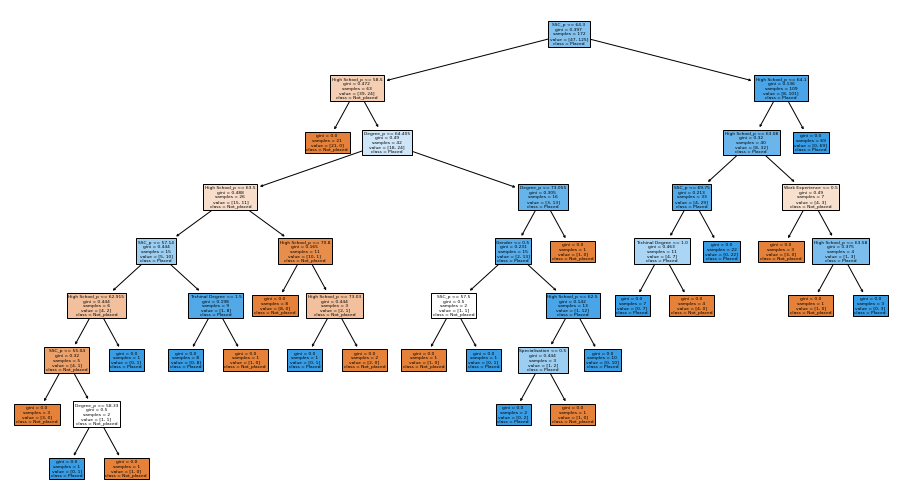

In [52]:
dc = DecisionTreeClassifier()
dc.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(dc,filled=True,class_names=['Not_placed','Placed'],feature_names=train.columns)

In [53]:
costpath = dc.cost_complexity_pruning_path(train,test)
ccp_alpha,impurities = costpath.ccp_alphas,costpath.impurities

In [54]:
modellist = []
for alpha in ccp_alpha:
    dc = DecisionTreeClassifier(ccp_alpha=alpha)
    dc.fit(X_train,y_train)
    modellist.append(dc)
    

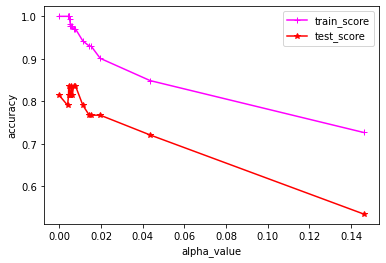

In [55]:
train_score = [clf.score(X_train,y_train) for clf in modellist]
test_score = [clf.score(X_test,y_test) for clf in modellist]

plt.xlabel('alpha_value')
plt.ylabel('accuracy')
plt.plot(ccp_alpha,train_score,label = 'train_score',marker = '+',color = 'magenta')
plt.plot(ccp_alpha,test_score,label = 'test_score',marker = '*',color = 'red')
plt.legend()
plt.show()

[Text(0.6, 0.9, 'SSC_p <= 64.3\ngini = 0.397\nsamples = 172\nvalue = [47, 125]\nclass = Placed'),
 Text(0.4, 0.7, 'High School_p <= 58.5\ngini = 0.472\nsamples = 63\nvalue = [39, 24]\nclass = Not_placed'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]\nclass = Not_placed'),
 Text(0.6, 0.5, 'Degree_p <= 64.405\ngini = 0.49\nsamples = 42\nvalue = [18, 24]\nclass = Placed'),
 Text(0.4, 0.3, 'High School_p <= 63.5\ngini = 0.488\nsamples = 26\nvalue = [15, 11]\nclass = Not_placed'),
 Text(0.2, 0.1, 'gini = 0.444\nsamples = 15\nvalue = [5, 10]\nclass = Placed'),
 Text(0.6, 0.1, 'gini = 0.165\nsamples = 11\nvalue = [10, 1]\nclass = Not_placed'),
 Text(0.8, 0.3, 'gini = 0.305\nsamples = 16\nvalue = [3, 13]\nclass = Placed'),
 Text(0.8, 0.7, 'gini = 0.136\nsamples = 109\nvalue = [8, 101]\nclass = Placed')]

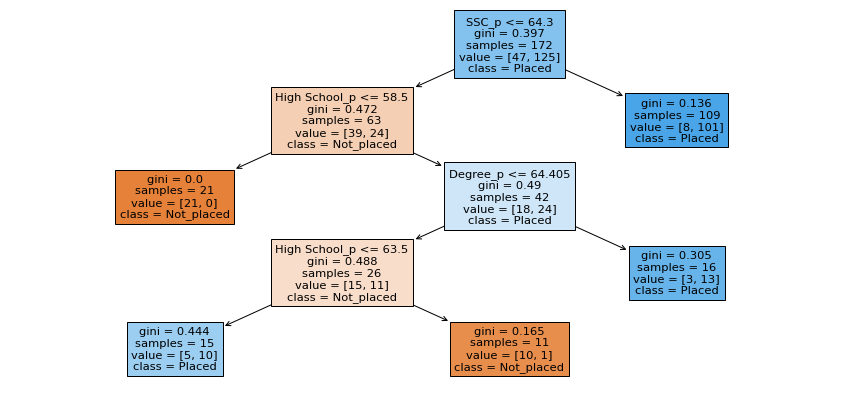

In [56]:
dc = DecisionTreeClassifier(ccp_alpha=0.0195)
dc.fit(X_train,y_train)
plt.figure(figsize=(15,7))
tree.plot_tree(dc,filled=True,class_names=['Not_placed','Placed'],feature_names=train.columns)

# Hyperparameter Tuning

In [57]:
params = {
    'RandomForest':{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators': [int(x) for x in np.linspace(start=1,stop=1200,num=10)],
            'max_depth':[int(x) for x in np.linspace(start=1,stop=30,num=5)],
            'min_samples_split':[2,5,10,12],
            'min_samples_leaf':[2,5,10,12],
            'max_features':['auto','sqrt'],
            'ccp_alpha':[0.0185,0.0190,0.0195,0.0200],
        }
    },
    
    'logistic':{
        'model':LogisticRegression(),
        'params':{
            'penalty':['l1', 'l2', 'elasticnet'],
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,1e-3,0.025,0.25,0.50],
            'solver':['lbfgs','liblinear','saga','newton-cg'],
            'multi_class':['auto', 'ovr', 'multinomial'],
            'max_iter':[int(x) for x in np.linspace(start=1,stop=250,num=10)],
        }
    },
    'D-tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy'],
            'splitter':['best','random'],
            'min_samples_split':[1,2,5,10,12],
            'min_samples_leaf':[1,2,5,10,12],
            'max_features':['auto','sqrt'],
            'ccp_alpha':[0.0185,0.0190,0.0195,0.0200],
        }
    },
    'SVM':{
        'model':SVC(),
        'params':{
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,0.025,0.50,0.75],
            'kernel':['linear','poly','sigmoid','rbf'],
            'max_iter':[int(x) for x in np.linspace(start=1,stop=250,num=10)],
        }
    }
}

In [58]:
scores = []
for model_name,mp in params.items():
    
    clf = RandomizedSearchCV(mp['model'],param_distributions=mp['params'],cv=5,n_iter=10,n_jobs=-1,scoring='accuracy')
    clf.fit(X_train,y_train)
    scores.append({
        'model_name':model_name,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_
    })

C:\Users\91939\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\91939\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91939\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\91939\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
ValueE

In [59]:
scores_df = pd.DataFrame(data = scores,columns = ['model_name','best_score','best_estimator'])
scores_df.head()

,model_name,best_score,best_estimator
0,RandomForest,0.860336,"(DecisionTreeClassifier(ccp_alpha=0.02, max_de..."
1,logistic,0.877647,"LogisticRegression(C=0.75, max_iter=111, solve..."
2,D-tree,0.831765,"DecisionTreeClassifier(ccp_alpha=0.0185, crite..."
3,SVM,0.842689,"SVC(C=0.75, kernel='poly', max_iter=111, tol=0..."


In [60]:
scores

[{'model_name': 'RandomForest',
  'best_score': 0.8603361344537814,
  'best_estimator': RandomForestClassifier(ccp_alpha=0.02, max_depth=15, min_samples_leaf=5,
                         n_estimators=400)},
 {'model_name': 'logistic',
  'best_score': 0.8776470588235293,
  'best_estimator': LogisticRegression(C=0.75, max_iter=111, solver='newton-cg', tol=0.25)},
 {'model_name': 'D-tree',
  'best_score': 0.831764705882353,
  'best_estimator': DecisionTreeClassifier(ccp_alpha=0.0185, criterion='entropy',
                         max_features='sqrt', min_samples_split=12)},
 {'model_name': 'SVM',
  'best_score': 0.8426890756302521,
  'best_estimator': SVC(C=0.75, kernel='poly', max_iter=111, tol=0.0001)}]

In [61]:
# random forest model


rf = RandomForestClassifier(ccp_alpha=0.02, max_depth=30, max_features='sqrt',
                         min_samples_leaf=2, min_samples_split=12,
                         n_estimators=267)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.7906976744186046


In [62]:
# logistic regression

lr = LogisticRegression(C=0.25, max_iter=111, multi_class='ovr', solver='newton-cg',
                     tol=1e-05)

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))


0.7906976744186046


In [63]:
# decision tree

dc = DecisionTreeClassifier(ccp_alpha=0.019, criterion='entropy',
                         max_features='auto', min_samples_leaf=5,
                         min_samples_split=5, splitter='random')
dc.fit(X_train,y_train)
y_pred = dc.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.6511627906976745


C:\Users\91939\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [64]:
print(metrics.classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.55      0.71        20
           1       0.72      1.00      0.84        23

    accuracy                           0.79        43
   macro avg       0.86      0.78      0.77        43
weighted avg       0.85      0.79      0.78        43



<AxesSubplot: >

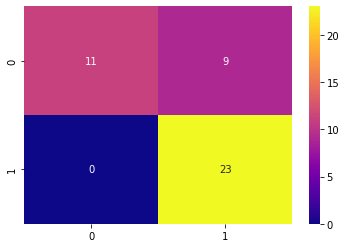

In [65]:
cn = metrics.confusion_matrix(y_test,rf.predict(X_test))
sns.heatmap(cn,annot=True,cmap='plasma')

# Model Testing

In [66]:
traindata = np.array(train)
predicted = []
for i in range(len(traindata)):
    predicted.append(rf.predict([traindata[i]]))
    
predicted

C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:4

C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:4

C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:4

C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:4

C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:4

[array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),

In [67]:
resultdf = train.copy()
resultdf['Actual'] = np.array(test)
resultdf['Predicted'] = np.array(predicted)
resultdf.head()

,Gender,Specialisation,Techinal Degree,Work Experience,SSC_p,High School_p,Degree_p,Actual,Predicted
0,1,1,2,0,67.00,91.00,58.00,1,1
1,1,0,2,1,79.33,78.33,77.48,1,1
2,1,0,0,0,65.00,68.00,64.00,1,1
3,1,1,2,0,56.00,52.00,52.00,0,0
4,1,0,0,0,85.80,73.60,73.30,1,1


In [68]:
resultdf['Actual'].value_counts()

1    148
0     67
Name: Actual, dtype: int64

In [69]:
resultdf['Predicted'].value_counts()

1    171
0     44
Name: Predicted, dtype: int64

In [70]:
getmappings

{'gender': {'F': 0, 'M': 1},
 'ssc_b': {'Central': 0, 'Others': 1},
 'hsc_b': {'Central': 0, 'Others': 1},
 'hsc_s': {'Arts': 0, 'Commerce': 1, 'Science': 2},
 'degree_t': {'Comm&Mgmt': 0, 'Others': 1, 'Sci&Tech': 2},
 'workex': {'No': 0, 'Yes': 1},
 'specialisation': {'Mkt&Fin': 0, 'Mkt&HR': 1},
 'status': {'Not Placed': 0, 'Placed': 1}}

### Predicted Probability

In [71]:
traindata = np.array(train)
predicted = []
for i in range(len(traindata)):
    predicted.append(rf.predict_proba([traindata[i]]))
    
predicted

C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:4

C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:4

C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:4

C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:4

C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:4

[array([[0.26504853, 0.73495147]]),
 array([[0.06662491, 0.93337509]]),
 array([[0.1886657, 0.8113343]]),
 array([[0.84099987, 0.15900013]]),
 array([[0.06747164, 0.93252836]]),
 array([[0.56630198, 0.43369802]]),
 array([[0.65973593, 0.34026407]]),
 array([[0.08329214, 0.91670786]]),
 array([[0.06747164, 0.93252836]]),
 array([[0.45950779, 0.54049221]]),
 array([[0.35907333, 0.64092667]]),
 array([[0.06526567, 0.93473433]]),
 array([[0.7765399, 0.2234601]]),
 array([[0.19474754, 0.80525246]]),
 array([[0.81871337, 0.18128663]]),
 array([[0.06908387, 0.93091613]]),
 array([[0.1253923, 0.8746077]]),
 array([[0.57430025, 0.42569975]]),
 array([[0.42345511, 0.57654489]]),
 array([[0.13367896, 0.86632104]]),
 array([[0.17200917, 0.82799083]]),
 array([[0.07106781, 0.92893219]]),
 array([[0.12848209, 0.87151791]]),
 array([[0.10138296, 0.89861704]]),
 array([[0.07538138, 0.92461862]]),
 array([[0.78116329, 0.21883671]]),
 array([[0.06436885, 0.93563115]]),
 array([[0.16703687, 0.83296313]])

In [72]:
predicted[0][0],predicted[0][0][0],predicted[0][0][1]

(array([0.26504853, 0.73495147]), 0.26504853223319136, 0.7349514677668083)

In [73]:
resultdf['Prob_not_getting_placed'] = np.array([predicted[i][0][0] for i in range(len(predicted))])
resultdf['Prob_getting_placed'] = np.array([predicted[i][0][1] for i in range(len(predicted))])
resultdf

,Gender,Specialisation,Techinal Degree,Work Experience,SSC_p,High School_p,Degree_p,Actual,Predicted,Prob_not_getting_placed,Prob_getting_placed
0,1,1,2,0,67.00,91.00,58.00,1,1,0.265049,0.734951
1,1,0,2,1,79.33,78.33,77.48,1,1,0.066625,0.933375
2,1,0,0,0,65.00,68.00,64.00,1,1,0.188666,0.811334
3,1,1,2,0,56.00,52.00,52.00,0,0,0.841000,0.159000
4,1,0,0,0,85.80,73.60,73.30,1,1,0.067472,0.932528
...,...,...,...,...,...,...,...,...,...,...,...
210,1,0,0,0,80.60,82.00,77.60,1,1,0.069432,0.930568
211,1,0,2,0,58.00,60.00,72.00,1,1,0.255574,0.744426
212,1,0,0,1,67.00,67.00,73.00,1,1,0.074991,0.925009
213,0,1,0,0,74.00,66.00,58.00,1,1,0.277692,0.722308


In [74]:
# saving the model

import pickle
file = open('campusplacementpredictor.pkl','wb')
pickle.dump(rf,file)
file.close()

### Conclusions


 + 16 records were missclassified,resulting in the accuracy of 93% on testing data
 + Random Forest model gave the best results
 